In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os



# I. About the dataset

We use the dataset **Energy balance matrix** from 1970 to 2021 of Brazil. The dataset is downloaded in the website of 
Olade.

The calculations for data processing base on the **Manual Olade 2011**

## I.1 Load the dataset

In [2]:
# Load the file
file_path = '../datas/Option_B/Brazil_Energy balance matrix.xlsx'
#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)

for k in Dict.keys():       
    # Round the values of each column in dataframe with 2 decimals
    Dict[k]=Dict[k].applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    
    #Ignor the first row (unit) in each df
    Dict[k]=Dict[k][1:]
    
    #Rename of columns in df
    Dict[k].rename(columns={'Unnamed: 0': 'SECTOR','OTHER PRIMARY_x000d_\n':'OTHER PRIMARY'}, inplace=True)   
    
    # Remove space in column names and Sector names
    Dict[k].columns=Dict[k].columns.str.strip()
    Dict[k].SECTOR=Dict[k].SECTOR.str.strip()
  
        
    
    
print(Dict.keys())

# Convert the keys of Dict to only contain the year
for k in list(Dict.keys()):
    k_new = k.split(' - ')[0]
    Dict[k_new] = Dict.pop(k)
    
    Dict[k_new]["Year"]=k_new
        
print('\n')
print(Dict.keys())



#Save the Clean Dictionary in Excel with multi-sheet_names
file_path='../datas/Option_B/Datas_cleaned/Brazil_Energy balance matrix_cleaned.xlsx'
    
with pd.ExcelWriter(file_path) as writer:
    for k, df in Dict.items():
        df.to_excel(writer, sheet_name=k)



dict_keys(['1970 - Brazil', '1971 - Brazil', '1972 - Brazil', '1973 - Brazil', '1974 - Brazil', '1975 - Brazil', '1976 - Brazil', '1977 - Brazil', '1978 - Brazil', '1979 - Brazil', '1980 - Brazil', '1981 - Brazil', '1982 - Brazil', '1983 - Brazil', '1984 - Brazil', '1985 - Brazil', '1986 - Brazil', '1987 - Brazil', '1988 - Brazil', '1989 - Brazil', '1990 - Brazil', '1991 - Brazil', '1992 - Brazil', '1993 - Brazil', '1994 - Brazil', '1995 - Brazil', '1996 - Brazil', '1997 - Brazil', '1998 - Brazil', '1999 - Brazil', '2000 - Brazil', '2001 - Brazil', '2002 - Brazil', '2003 - Brazil', '2004 - Brazil', '2005 - Brazil', '2006 - Brazil', '2007 - Brazil', '2008 - Brazil', '2009 - Brazil', '2010 - Brazil', '2011 - Brazil', '2012 - Brazil', '2013 - Brazil', '2014 - Brazil', '2015 - Brazil', '2016 - Brazil', '2017 - Brazil', '2018 - Brazil', '2019 - Brazil', '2020 - Brazil', '2021 - Brazil'])


dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '19

In [3]:
df_2021=Dict['2021']

In [4]:
df_2021.columns  

#LPG stands for Liquefied Petroleum Gas

Index(['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL',
       'Year'],
      dtype='object')

## I.2 Frist visualization of energy balance (Supply-Transformation-Consumption)

In [5]:
Dict1=Dict.copy()

for k in Dict1.keys():
    selected_columns = ['SECTOR', 'TOTAL PRIMARIES', 'TOTAL SECUNDARIES', 'TOTAL','Year']
    Dict1[k]=Dict1[k][selected_columns]
    selected_rows=['TOTAL SUPPLY','TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict1[k]=Dict1[k][Dict1[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict1.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    
# Get the df "TOTAL SUPPLY"

df_TS=df_conc.loc[df_conc["SECTOR"]=="TOTAL SUPPLY"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TS='../datas/Option_B/Datas_cleaned/TOTAL_SUPPLY_Brazil.xlsx'
df_TS.to_excel(file_TS)

# Get the df "TOTAL TRANSFORMATION"

df_TT=df_conc.loc[df_conc["SECTOR"]=="TOTAL TRANSFORMATION"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TT='../datas/Option_B/Datas_cleaned/TOTAL_TRANSFORMATION_Brazil.xlsx'
df_TT.to_excel(file_TT)

# Get the df "FINAL CONSUMPTION"

df_TC=df_conc.loc[df_conc["SECTOR"]=="FINAL CONSUMPTION"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TC='../datas/Option_B/Datas_cleaned/FINAL CONSUMPTION_Brazil.xlsx'
df_TC.to_excel(file_TC)


df_TS.head()

,TOTAL PRIMARIES,TOTAL SECUNDARIES,TOTAL
Year,,,
1970,67176.64,30633.82,66742.4
1971,69391.7,34509.96,70092.03
1972,76197.42,38477.46,75111.33
1973,83252.49,45191.03,81963.44
1974,87620.68,50406.2,87628.2


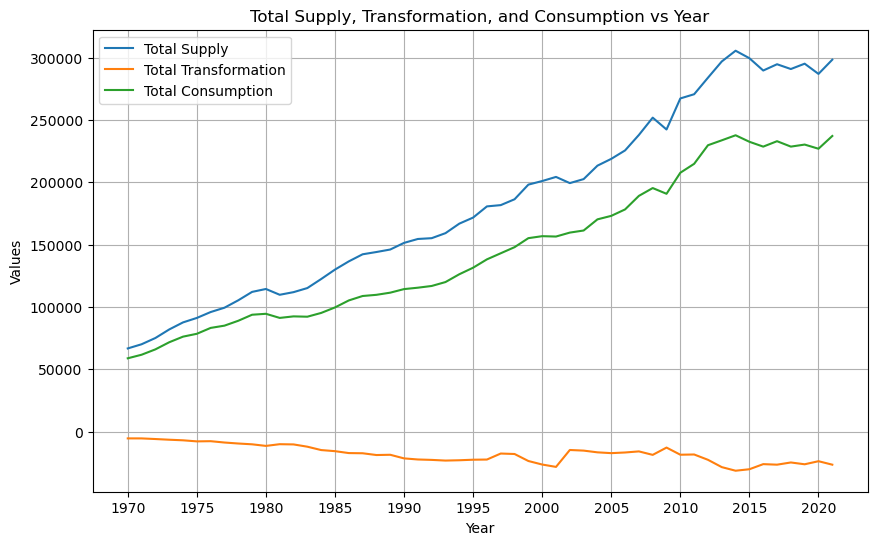

In [6]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

# Plot Total Supply
sns.lineplot(data=df_TS, x=df_TS.index, y='TOTAL', label='Total Supply', ax=ax)

# Plot Total Transformation
sns.lineplot(data=df_TT, x=df_TT.index, y='TOTAL', label='Total Transformation', ax=ax)

# Plot Total Consumption
sns.lineplot(data=df_TC, x=df_TC.index, y='TOTAL', label='Total Consumption', ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Total Supply, Transformation, and Consumption vs Year')
ax.set_xticks(df_TS.index[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

## I.3 SUPPLY

### I.3.1. Preview the Total Supply of Primary Sources

The primary sources include: **'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY'**

In [7]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS1 = df_TS1.apply(lambda column: column.fillna(0))
    
df_TS1.head()


,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,TOTAL PRIMARIES
Year,,,,,,,,,,
1970,25664.25,180.02,2235.39,3421.52,0,0.0,31851.53,3600.70,223.24,67176.64
1971,27222.25,279.11,2294.86,3713.63,0,0.0,31807.22,3841.81,232.82,69391.70
1972,32473.41,313.00,2311.25,4356.82,0,0.0,32143.13,4298.39,301.43,76197.42
1973,38778.41,358.06,2287.08,4976.55,0,0.0,31897.40,4644.41,310.58,83252.49
1974,41479.10,544.45,2384.82,5646.13,0,0.0,32598.64,4618.65,348.89,87620.68


In [8]:
# Check if any columns have negative values
def negative_values(df):
    columns_with_negative_values = df.columns[df.lt(0).any()]
    # Count the number of negative values in each column
    negative_values_count = df.lt(0).sum()

    # Print the columns with negative values (if any)
    if not columns_with_negative_values.empty:
        print("Columns with negative values:")
        print(columns_with_negative_values)
        # Print the count of negative values in each column
        print("Number of negative values in each column:")
        print(negative_values_count)
    else:
        print("No columns have negative values.")
        
negative_values(df_TS1)

Columns with negative values:
Index(['NUCLEAR'], dtype='object')
Number of negative values in each column:
OIL                       0
NATURAL GAS               0
COAL                      0
HYDROENERGY               0
GEOTHERMAL                0
NUCLEAR                   1
FIREWOOD                  0
SUGARCANE AND PRODUCTS    0
OTHER PRIMARY             0
TOTAL PRIMARIES           0
dtype: int64


<Figure size 1000x600 with 0 Axes>

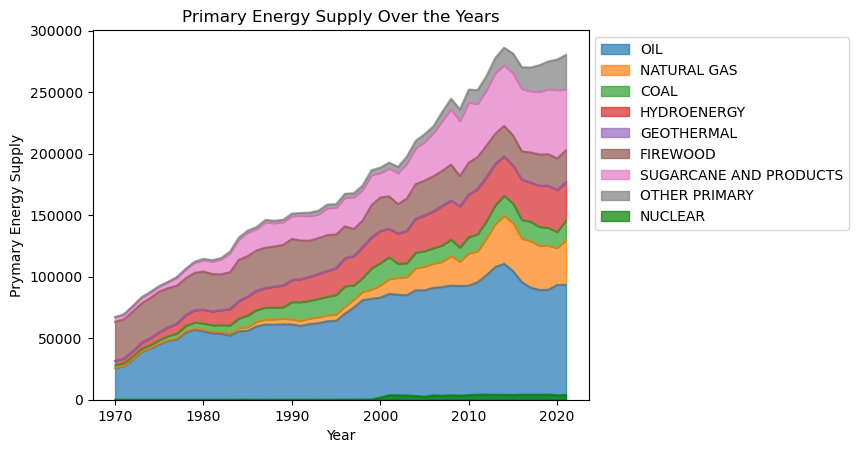

In [9]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Separate the positive and negative parts of the 'NUCLEAR' column
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()

# Plot the stack plot for positive and negative parts separately
plt.figure(figsize=(10, 6))  # Set the figure size if needed
ax = df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7)
positive_nuclear.plot(kind='area', ax=ax, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax, color='red', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Prymary Energy Supply')
plt.title('Primary Energy Supply Over the Years')

# Move the legend directly to the figure
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

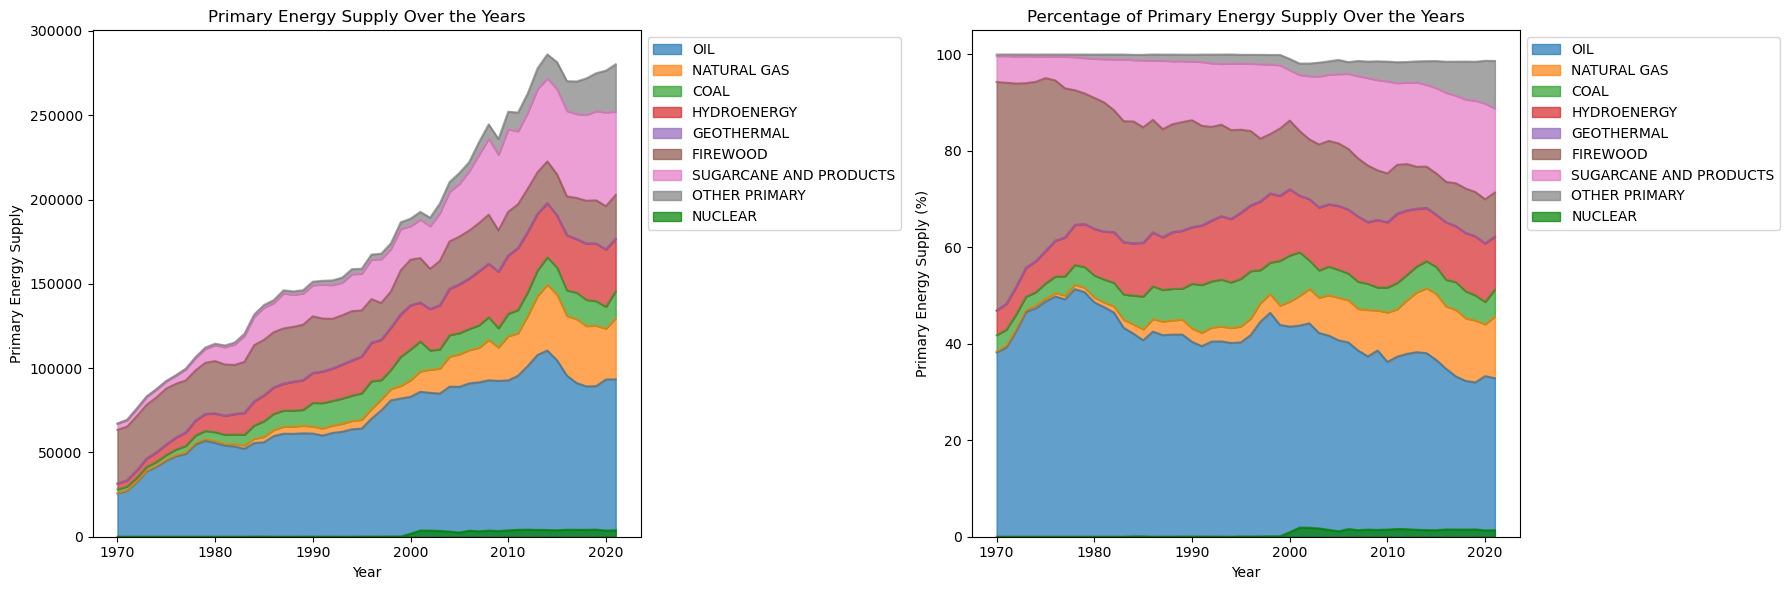

In [10]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns = ['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY']
df_TS1_percentages = (df_stackplot[percentage_columns].div(df_TS1['TOTAL PRIMARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# First stack plot for Primary Energy Supply
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
#negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()
df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax1)#drop(columns='NUCLEAR').
positive_nuclear.plot(kind='area', ax=ax1, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax1, color='red', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Primary Energy Supply')
ax1.set_title('Primary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Second stack plot for Percentage of Primary Energy Supply
positive_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(lower=0)
#negative_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(upper=0).abs()
df_TS1_percentages.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax2)
positive_nuclear_percent.plot(kind='area', ax=ax2, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear_percent.plot(kind='area', ax=ax2, color='red', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Primary Energy Supply (%)')
ax2.set_title('Percentage of Primary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

In [11]:
df_2021.SECTOR

1                                PRODUCTION
2                                    IMPORT
3                                    EXPORT
4                              STOCK CHANGE
5                                    UNUSED
6                              TOTAL SUPPLY
7                                REFINERIES
8                              POWER PLANTS
9                            SELF-PRODUCERS
10                               GAS PLANTS
11                          CHARCOAL PLANTS
12    COKE PLANTS AND BLAST FURNACES_x000d_
13                             DISTILLERIES
14                            OTHER CENTERS
15                     TOTAL TRANSFORMATION
16                          OWN CONSUMPTION
17                                   LOSSES
18                               ADJUSTMENT
19                                TRANSPORT
20                               INDUSTRIAL
21                              RESIDENTIAL
22             COMMERCIAL, SERVICES, PUBLIC
23          AGRICULTURE, FISHING

In [12]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['IMPORT', 'EXPORT']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_IMP_EXP=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_IMP_EXP = df_IMP_EXP.apply(lambda column: column.fillna(0))
    
df_IMP_EXP.head(5)


,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,TOTAL PRIMARIES
Year,,,,,,,,,,
1970,17845.05,0.0,1358.47,0,0,0.0,0.0,0,0,19203.53
1970,65.05,0.0,0.00,0,0,0.0,0.0,0,0,65.05
1971,20434.56,0.0,1155.91,0,0,0.0,0.0,0,0,21590.47
1971,766.34,0.0,0.00,0,0,0.0,0.0,0,0,766.34
1972,25706.19,0.0,1283.81,0,0,0.0,0.0,0,0,26990.00


### I.3.2 Preview of the Total Supply of secondary energy sources

The secondary energy ensources include: **'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY'**

In [13]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR',  'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY', 'TOTAL SECUNDARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS2=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS2 = df_TS2.apply(lambda column: column.fillna(0))
    
df_TS2.head()

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns_2 = ['ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL', 'KEROSENE/JET FUEL',
       'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL', 'GASES',
       'OTHER SECONDARY', 'NON-ENERGY']
df_TS2_percentages = (df_TS2[percentage_columns_2].div(df_TS2['TOTAL SECUNDARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)


In [14]:
negative_values(df_TS2)

No columns have negative values.


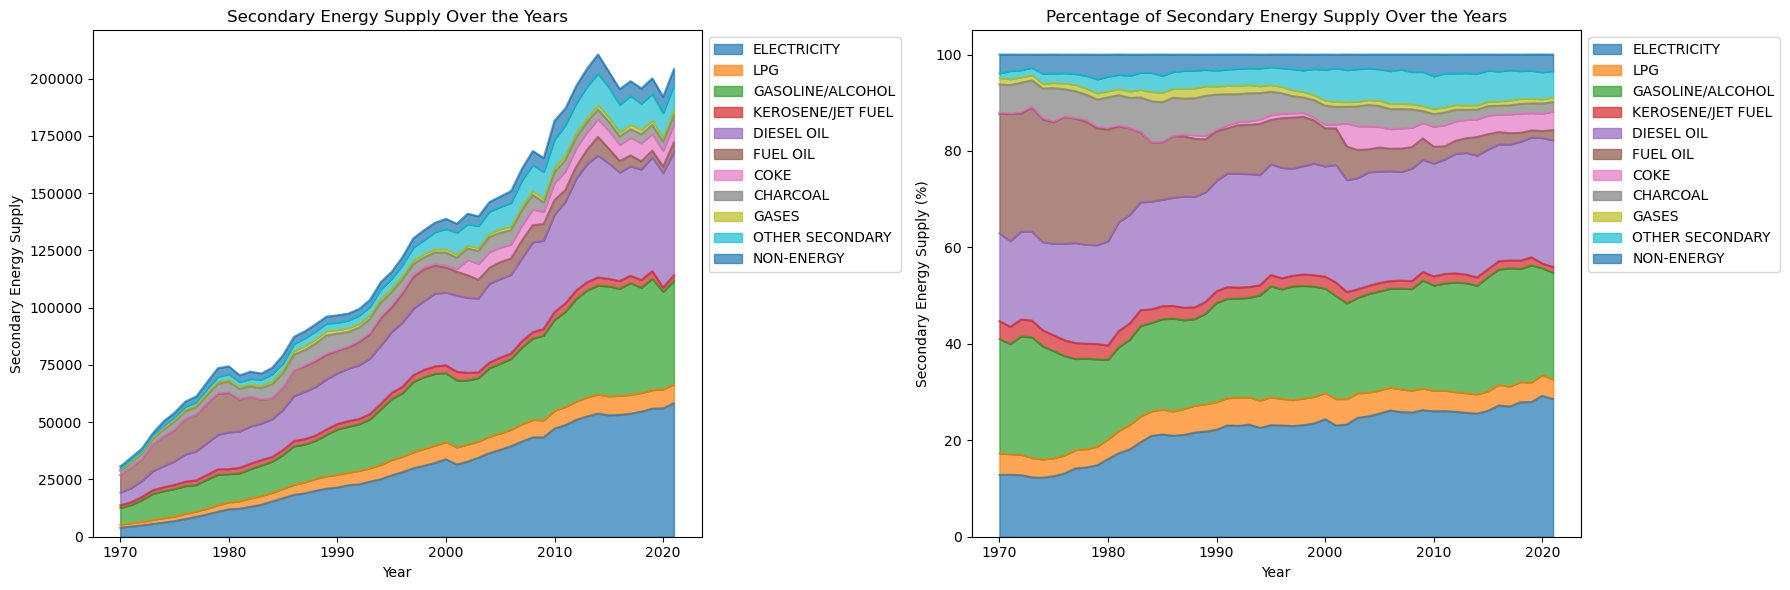

In [15]:
# Drop the 'TOTAL SECUNDARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS2.drop(columns="TOTAL SECUNDARIES")
# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Secondary Energy Supply')
ax1.set_title('Secondary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_TS2_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel('Secondary Energy Supply (%)')
ax2.set_title('Percentage of Secondary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

## I.4 CONSUMPTION




**Antonio's notes:**

Pronosticar y analizar consumos energéticos:

 -Balance Eurostat
 
 -Balance España
 
Desagregar el consumo por destino

Evolución de los consumos:

 -Patrón
 
 -Correlaciones
 
 -Tipos de consumo
 
 -Relación entre Incremento económico (ciclos económicos de crecimiento)
 
                          Incremento consumo energético
                          
Análisis integrado con todos los consumos y ver si el abastecimiento, es decir, la oferta.

Validar los "nan" de cada fuente primaria de Brasil

Evaluar la industrialización de Brasil a futuro para ver como va a influir en su consumo

¿Es exportador de energía Brasil?

Pérdidas de energía eléctrica por distribución

Capacidad operativa de energía hidroeléctrica por las capacidades hídricas de los ríos


**Edu's notes:**

Entiendo que nos dice que hay que que ver la evolución del consumo en cuanto a los suministros

Relación oferta y demanda por segmentos en las series temporales

De esa forma también podriamos ver la correlación entre las variables (positivas/negativas) en estas series temporales que en Brasil han influido en la demanda/oferta en los diferentes segementos en las series temporales y así se veria la evolución

En cuanto a los escenarios, no se como plantearlos, se me ocurre algo pero necesito vuestra opinión:

Escenario con un aumento o disminución de la población lo que reflejaría un cambio en el consumo final energético.

Escenario con un aumento o disminución de la economía brasileña y su impacto en el consumo final energético.

Escenario de un desarrollo tecnológico que muestre su impacto en el consumo final energético

In [16]:
df_2021

,SECTOR,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,...,DIESEL OIL,FUEL OIL,COKE,CHARCOAL,GASES,OTHER SECONDARY,NON-ENERGY,TOTAL SECUNDARIES,TOTAL,Year
1,PRODUCTION,152713.43,26371.48,2633.08,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,41972.43,16109.25,6866.86,3915.43,2060.14,9109.18,5630.96,189790.51,320203.76,2021
2,IMPORT,7359.21,14796.23,13216.31,NaN,NaN,NaN,NaN,NaN,NaN,...,12211.92,581.74,1150.16,NaN,NaN,2901.18,1712.36,31674.9,67046.66,2021
3,EXPORT,65724.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,499.3,11963.08,NaN,NaN,NaN,841.83,385.76,17331.46,83055.53,2021
4,STOCK CHANGE,-1007.78,-3598.93,67.82,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.66,-431.71,-92.5,NaN,NaN,-25.31,-8.2,-35.62,-4574.51,2021
5,UNUSED,NaN,1217.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1217.87,2021
6,TOTAL SUPPLY,93340.78,36350.92,15917.21,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,53662.39,4296.2,7924.52,3915.43,2060.14,11143.23,6949.36,204098.32,298402.5,2021
7,REFINERIES,-92551.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36249.21,16109.25,NaN,NaN,NaN,7528.3,4710.47,95389.98,2838.23,2021
8,POWER PLANTS,NaN,-13219.0,-4189.67,-29752.22,NaN,-3835.75,-56.11,NaN,-7138.42,...,-1371.21,-1656.49,NaN,NaN,NaN,-75.3,NaN,46508.5,-14785.66,2021
9,SELF-PRODUCERS,NaN,-4266.04,-215.78,-1372.79,NaN,NaN,-373.38,-5782.78,-5688.41,...,-561.98,-225.32,NaN,NaN,-394.47,-551.3,NaN,9776.97,-9655.28,2021
10,GAS PLANTS,NaN,-2583.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,920.49,2354.08,-229.54,2021


In [17]:
df_2021.SECTOR.unique()

array(['PRODUCTION', 'IMPORT', 'EXPORT', 'STOCK CHANGE', 'UNUSED',
       'TOTAL SUPPLY', 'REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
       'GAS PLANTS', 'CHARCOAL PLANTS',
       'COKE PLANTS AND BLAST FURNACES_x000d_', 'DISTILLERIES',
       'OTHER CENTERS', 'TOTAL TRANSFORMATION', 'OWN CONSUMPTION',
       'LOSSES', 'ADJUSTMENT', 'TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'ENERGY CONSUMPTION',
       'NON-ENERGY CONSUMPTION', 'FINAL CONSUMPTION'], dtype=object)

In [30]:
Dict2=Dict.copy()

for k in Dict2.keys():
   # selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
    #   'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    selected_columns = ['SECTOR','TOTAL','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS',
       'NON-ENERGY CONSUMPTION','ENERGY CONSUMPTION', 'FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    #df_TC1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TC1 = df_conc.apply(lambda column: column.fillna(0))
    
df_TC1.tail(10)

,SECTOR,TOTAL
Year,,
2020,FINAL CONSUMPTION,226959.77
2021,TRANSPORT,85176.10
2021,INDUSTRIAL,82389.66
2021,RESIDENTIAL,28421.75
2021,"COMMERCIAL, SERVICES, PUBLIC",12548.34
2021,"AGRICULTURE, FISHING AND MINING",15421.69
2021,CONSTRUCTION AND OTHERS,0.00
2021,ENERGY CONSUMPTION,223957.54
2021,NON-ENERGY CONSUMPTION,13236.97


In [33]:
# Group by Year and SECTOR, and sum the TOTAL values
grouped_df = df_TC1.groupby(['Year', 'SECTOR'])['TOTAL'].sum().reset_index()

grouped_df.tail(6)

# Pivot the data
pivot_df = grouped_df.pivot(index='Year', columns='SECTOR', values='TOTAL')


# Display the result
pivot_df.tail()



SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,ENERGY CONSUMPTION,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT
Year,,,,,,,,,
2017,14947.62,12453.69,0.0,217970.64,233004.63,82334.45,15033.99,25356.57,82878.31
2018,15092.95,12678.81,0.0,214547.45,228665.38,78167.81,14117.93,26377.98,82229.91
2019,15123.66,13113.50,0.0,216058.03,230298.05,76310.71,14240.02,26589.02,84921.14
2020,15168.99,12027.15,0.0,214403.72,226959.77,79593.61,12556.05,28199.70,79414.26
2021,15421.69,12548.34,0.0,223957.54,237194.52,82389.66,13236.97,28421.75,85176.10


In [32]:
# Dataframe Energy Consumption (EC)
df_EC=pivot_df.drop(columns=['ENERGY CONSUMPTION'])
df_EC.head()

SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT
Year,,,,,,,,
1970,5351.01,1266.80,0.00,58834.12,16020.92,1457.73,22075.66,12661.99
1971,5317.39,1406.98,0.00,61691.69,17454.73,1416.75,22253.96,13841.87
1972,5338.47,1570.69,0.00,65995.12,19026.99,1984.88,22440.87,15633.22
1973,5441.91,1737.84,0.00,71692.86,21493.43,2336.65,22354.13,18328.90
1974,5376.38,1873.46,7.15,76198.40,23257.01,3262.03,22316.70,20105.68


In [21]:
# Drop the 'FINAL CONSUMPTION' column and calculate the percentages
df_percentages = (df_EC.drop(columns=['FINAL CONSUMPTION']).div(df_EC['FINAL CONSUMPTION'], axis=0) * 100)
df_percentages = df_percentages.round(0)

df_percentages.tail(20)

SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT
Year,,,,,,,
2002,5.0,5.0,0.0,41.0,5.0,13.0,31.0
2003,5.0,5.0,0.0,42.0,5.0,13.0,29.0
2004,6.0,5.0,0.0,41.0,5.0,13.0,30.0
2005,7.0,5.0,0.0,41.0,5.0,13.0,30.0
2006,6.0,5.0,0.0,41.0,5.0,12.0,30.0
2007,7.0,5.0,0.0,41.0,5.0,12.0,30.0
2008,7.0,5.0,0.0,40.0,4.0,12.0,32.0
2009,6.0,5.0,0.0,39.0,5.0,12.0,33.0
2010,6.0,5.0,0.0,40.0,5.0,11.0,33.0


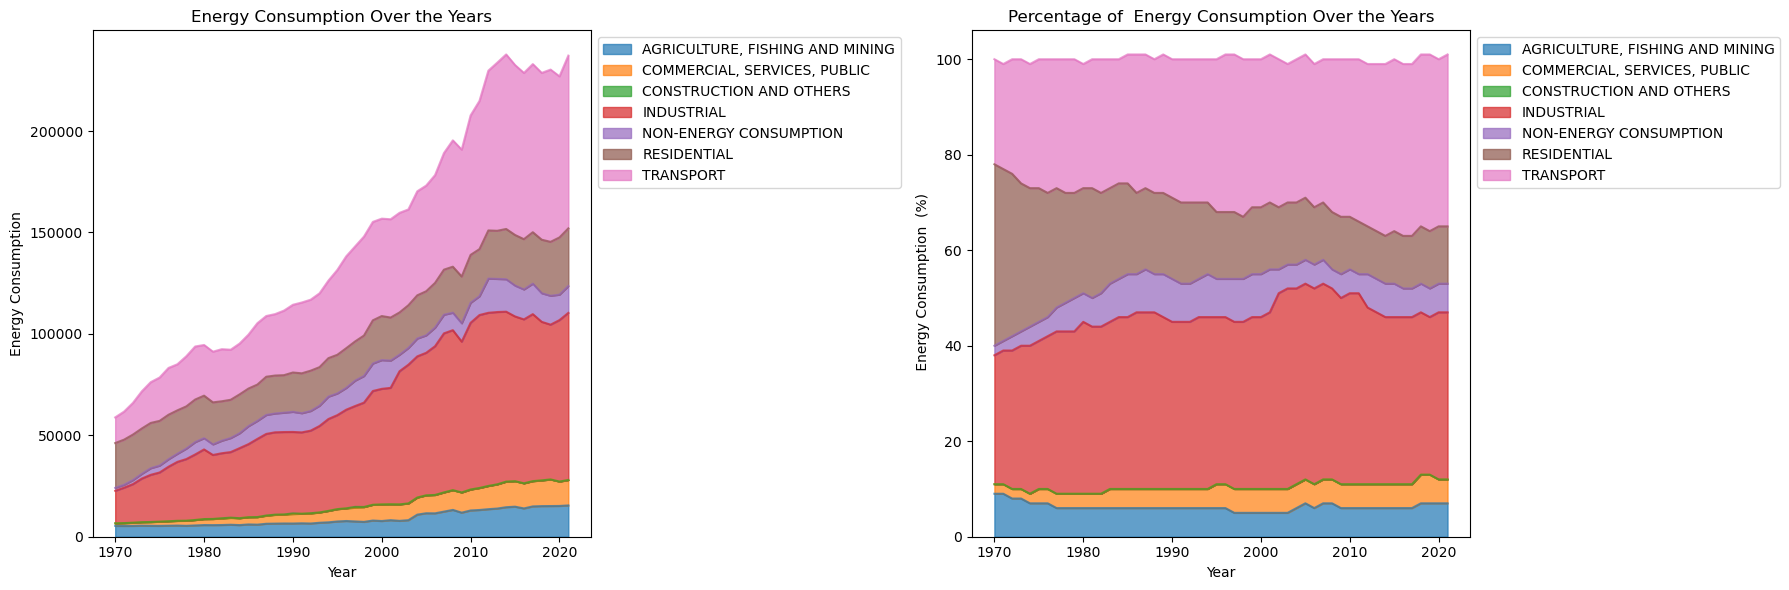

In [22]:
# Drop the 'FINAL CONSUMPTION' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_EC.drop(columns=["FINAL CONSUMPTION"])

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

**EUROSTAT**

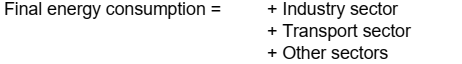

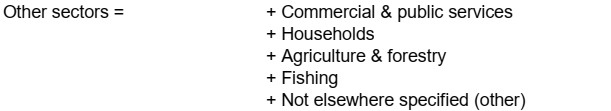





In [118]:
df_cons=pivot_df.copy()
df_cons.columns


Index(['AGRICULTURE, FISHING AND MINING', 'COMMERCIAL, SERVICES, PUBLIC',
       'CONSTRUCTION AND OTHERS', 'ENERGY CONSUMPTION', 'FINAL CONSUMPTION',
       'INDUSTRIAL', 'NON-ENERGY CONSUMPTION', 'RESIDENTIAL', 'TRANSPORT'],
      dtype='object', name='SECTOR')

In [119]:
OTHER_SECTORS=['AGRICULTURE, FISHING AND MINING', 'COMMERCIAL, SERVICES, PUBLIC', 'CONSTRUCTION AND OTHERS', 'RESIDENTIAL']
df_cons['OTHER SECTORS']=df_cons[OTHER_SECTORS].sum(axis=1)

df_cons.drop(columns=OTHER_SECTORS+["FINAL CONSUMPTION", "ENERGY CONSUMPTION"], inplace=True)

# Drop columns and update df_cons in place
#df_cons.drop(columns=["FINAL CONSUMPTION", "ENERGY CONSUMPTION"], inplace=True)

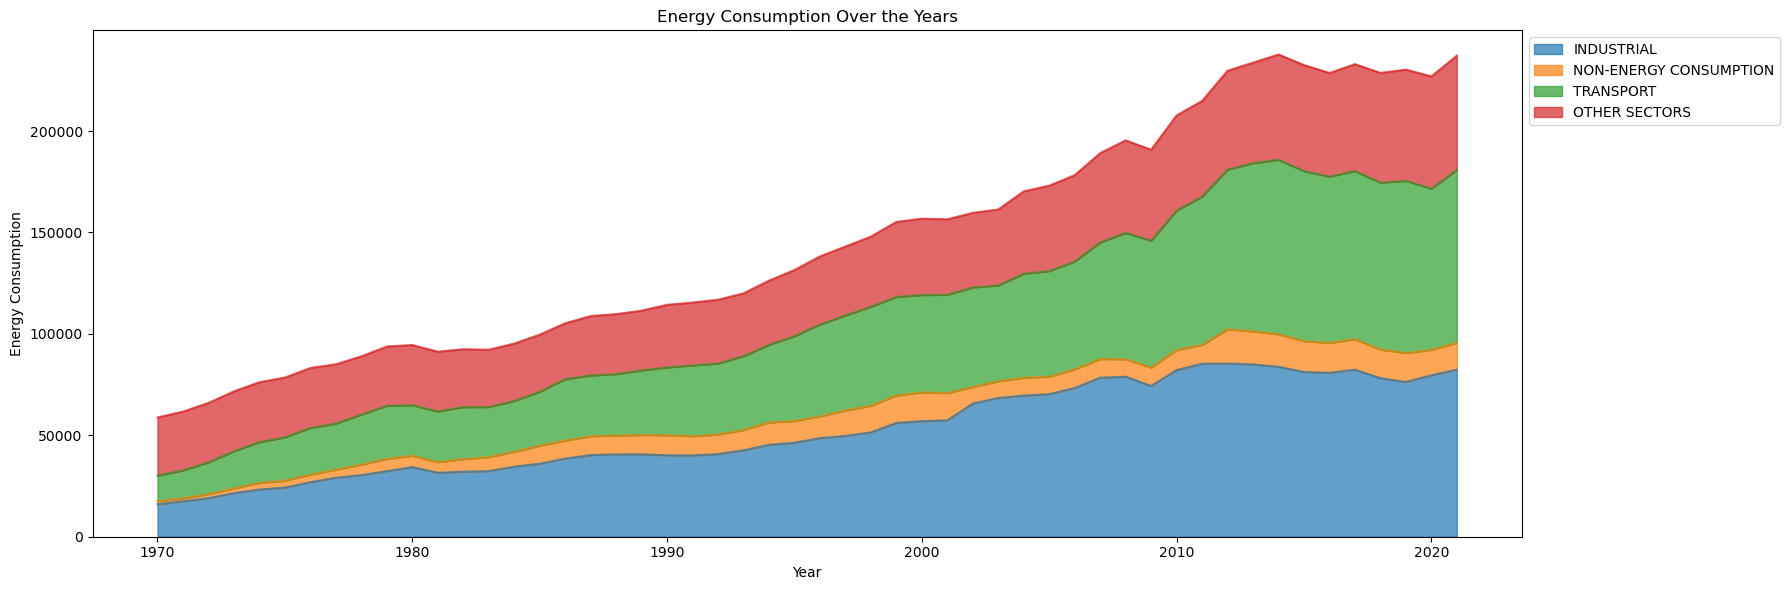

In [120]:
# Plot the area stack plot
fig, ax1 = plt.subplots(1, 1, figsize=(18, 6))

df_cons.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

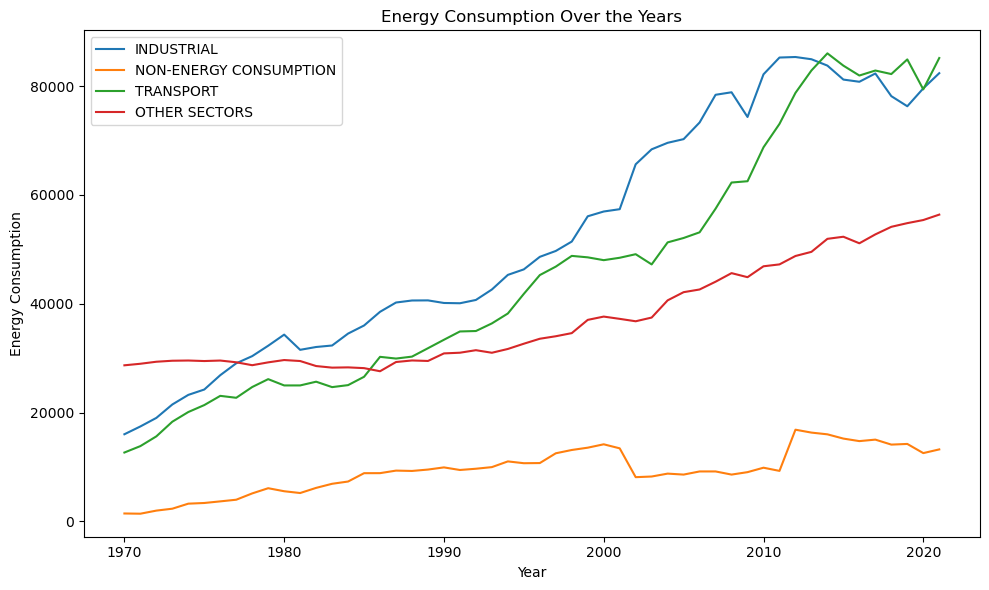

In [121]:

# Line_Plot:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

df_cons.plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [136]:
#1. Assume that the target is INDUSTRIAL:
y= df_cons.INDUSTRIAL
X=df_cons.drop(columns=["INDUSTRIAL"])

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=1)

When dealing with time series prediction problems, the choice of a suitable model depends on the specific characteristics of your data and the goals of your prediction task. Here are some commonly used models for time series forecasting:

Autoregressive Integrated Moving Average (ARIMA): ARIMA is a classical time series forecasting model that combines autoregression, differencing, and moving average components. It's suitable for univariate time series data with a clear trend and seasonality.

Seasonal Decomposition of Time Series (STL): STL decomposes a time series into seasonal, trend, and remainder components. It's useful for understanding and removing seasonality and trend before applying other forecasting models.

Exponential Smoothing (ETS): ETS methods capture patterns in the time series data by giving different weights to recent observations. They include models like Holt's Linear Exponential Smoothing, Holt-Winters' Exponential Smoothing, etc.

Prophet: Developed by Facebook, Prophet is designed to handle time series data with daily observations that might have missing values and outliers. It can capture trend, seasonality, and holiday effects.

Long Short-Term Memory (LSTM): LSTMs are a type of recurrent neural network (RNN) capable of modeling complex patterns in sequences. They are well-suited for capturing long-term dependencies in time series data.

Gated Recurrent Units (GRU): Similar to LSTMs, GRUs are a type of RNN that can capture sequential patterns in time series data. They often have fewer parameters and are quicker to train than LSTMs.

Convolutional Neural Networks (CNNs): While primarily used for image data, CNNs can be adapted for time series forecasting by treating the time series as an image, where the x-axis represents time and the y-axis represents values.

Transformer Models: Originally designed for natural language processing, transformer models like the original "Attention Is All You Need" model and its variants (e.g., BERT) have been applied to time series forecasting by considering the sequence as a set of tokens.

VAR (Vector Autoregression): VAR models extend the idea of autoregression to multiple time series variables, considering the relationships between them. They are suitable for multivariate time series forecasting.

State Space Models: State space models, such as the Kalman filter and its extensions, are used to estimate hidden states and their interactions with observable data. These models can handle complex relationships and missing data.

It's important to note that there's no one-size-fits-all solution, and the choice of model should be based on the nature of your data, the available computational resources, and the level of accuracy required for your prediction task. Experimentation and testing multiple models can help you identify the best approach for your specific time series forecasting problem.

In [139]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Define candidate models
models = [
    ('RandomForest', RandomForestRegressor()),
    ('ExponentialSmoothing', ExponentialSmoothing()),
    ('ARIMA', ARIMA()),
    ('LSTM', None),  # Placeholder for LSTM
    ('STL', None),   # Placeholder for STL
]

# Set up pipeline
results = {}
for name, model in models:
    print(f"Evaluating {name}...")

    if name == 'LSTM':
        # Perform data preprocessing (scaling, sequence generation, etc.)
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        sequence_length = 10  # Adjust as needed
        X_train_sequences = [X_train_scaled[i:i+sequence_length] for i in range(len(X_train_scaled) - sequence_length)]
        y_train_sequences = y_train[sequence_length:]

        # Create an LSTM model
        lstm_model = Sequential()
        lstm_model.add(LSTM(units=50, input_shape=(X_train_sequences[0].shape[0], X_train_sequences[0].shape[1])))
        lstm_model.add(Dense(units=1))

        # Compile and train the LSTM model
        lstm_model.compile(optimizer='adam', loss='mean_squared_error')
        lstm_model.fit(np.array(X_train_sequences), np.array(y_train_sequences), epochs=10, batch_size=32, verbose=0)

        # Predict on test data
        X_test_sequences = [X_test_scaled[i:i+sequence_length] for i in range(len(X_test_scaled) - sequence_length)]
        y_pred = lstm_model.predict(np.array(X_test_sequences))

        # Calculate MAE
        score = mean_absolute_error(y_test[sequence_length:], y_pred)
        scores.append(score)
    elif name == 'STL':
        # Implement STL training and prediction here
        # ...
        pass
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Example: feature scaling
            ('model', model)
        ])
        
        # Cross-validation
        tscv = TimeSeriesSplit(n_splits=5)  # TimeSeriesSplit for time series data
        scores_fold = []  # Store scores for each fold
        for train_idx, test_idx in tscv.split(Xtrain):
            X_train, X_test = Xtrain.iloc[train_idx], Xtrain.iloc[test_idx]
            y_train, y_test = ytrain.iloc[train_idx], ytrain.iloc[test_idx]
            
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            
            score = mean_absolute_error(y_test, y_pred)
            scores_fold.append(score)
        
        results[name] = scores_fold

# Print and compare results
for name, scores in results.items():
    print(f"{name}: Mean MAE = {sum(scores) / len(scores)}")








TypeError: ExponentialSmoothing.__init__() missing 1 required positional argument: 'endog'

In [34]:
file_path = '../datas/Option_B/Datas_cleaned/Summarized enegy balance_Brazil_1970_2021.xlsx'

df1=pd.read_excel(file_path)


In [35]:
df1.drop(columns=['Unnamed: 0'], inplace=True)


In [25]:
df1.rename(columns={'Final Consumption':'SECTOR'},inplace=True)
df1.head()

,SECTOR,T.S. Oil derivatives,T.S. Coke + T.S. charcoal,T.S. Oil,T.S. Natural gas,T.S. Coal,T.S. Hydroenergy,T.S. Nuclear,T.S. Other primaries,T.S. Electricity,S.T. Firewood,O.T. Sugarcane and products,Year,Unit
0,Total supply,24833.79,1869.52,25664.25,180.02,2235.39,3421.52,NaN,223.24,3930.52,31851.53,3600.70,1970,10³ tep
1,Charcoal + Coke plants,375.32,1707.43,NaN,NaN,1483.73,NaN,NaN,NaN,NaN,3493.85,NaN,1970,10³ tep
2,Power plants,1184.49,NaN,NaN,NaN,464.09,3421.52,NaN,81.16,3932.24,12.70,88.99,1970,10³ tep
3,Refineries,24598.32,55.18,25535.85,104.22,158.93,NaN,NaN,NaN,NaN,NaN,NaN,1970,10³ tep
4,"Agriculture, fishing and mining",403.70,19.37,NaN,NaN,NaN,NaN,NaN,NaN,27.25,4900.69,NaN,1970,10³ tep


In [26]:

df1['TOTAL']= df1.iloc[:, 1:-2].sum(axis=1)

In [27]:
df1.tail(10)

,SECTOR,T.S. Oil derivatives,T.S. Coke + T.S. charcoal,T.S. Oil,T.S. Natural gas,T.S. Coal,T.S. Hydroenergy,T.S. Nuclear,T.S. Other primaries,T.S. Electricity,S.T. Firewood,O.T. Sugarcane and products,Year,Unit,TOTAL
524,Total supply,133991.00,11839.95,93340.78,36350.92,15917.21,31125.01,3835.75,28037.32,58267.37,26017.95,49469.74,2021,10³ tep,488193.00
525,Charcoal + Coke plants,779.92,10782.29,NaN,NaN,7849.84,NaN,NaN,NaN,NaN,7346.03,NaN,2021,10³ tep,26758.08
526,Power plants,4836.06,NaN,NaN,17485.04,4405.45,31125.01,3835.75,12826.83,56285.46,429.48,5782.78,2021,10³ tep,137011.86
527,Refineries,103076.91,NaN,93286.20,2583.62,NaN,NaN,NaN,5589.70,NaN,NaN,NaN,2021,10³ tep,204536.43
528,"Agriculture, fishing and mining",7824.92,41.59,NaN,261.08,146.11,NaN,NaN,NaN,3998.10,3149.90,NaN,2021,10³ tep,15421.70
529,"Commercial, services, public",729.05,76.99,NaN,136.77,NaN,NaN,NaN,176.91,11346.64,81.99,NaN,2021,10³ tep,12548.35
530,Industrial,13021.03,NaN,NaN,215.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,10³ tep,13236.97
531,Non-energy consumption,10479.38,11210.49,NaN,8417.91,3497.42,NaN,NaN,8568.38,17209.25,7588.34,15418.50,2021,10³ tep,82389.67
532,Residential,6507.29,411.72,NaN,454.97,NaN,NaN,NaN,716.94,12908.61,7422.22,NaN,2021,10³ tep,28421.75
533,Transport,83101.33,NaN,NaN,1903.20,NaN,NaN,NaN,NaN,171.57,NaN,NaN,2021,10³ tep,85176.10


In [28]:
# Calculate the percentage 

df1_percentages = (df1.drop(columns=['TOTAL','Year','Unit','SECTOR']).div(df1['TOTAL'], axis=0) * 100)
df1_percentages = df1_percentages.round(0)

df1_percentages.tail(20)

,T.S. Oil derivatives,T.S. Coke + T.S. charcoal,T.S. Oil,T.S. Natural gas,T.S. Coal,T.S. Hydroenergy,T.S. Nuclear,T.S. Other primaries,T.S. Electricity,S.T. Firewood,O.T. Sugarcane and products
514,26.0,2.0,20.0,6.0,3.0,7.0,1.0,5.0,12.0,5.0,12.0
515,3.0,39.0,NaN,NaN,27.0,NaN,NaN,NaN,NaN,30.0,NaN
516,2.0,NaN,NaN,10.0,2.0,27.0,3.0,8.0,42.0,0.0,5.0
517,50.0,NaN,46.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
518,51.0,0.0,NaN,1.0,1.0,NaN,NaN,NaN,25.0,21.0,NaN
519,5.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,91.0,1.0,NaN
520,98.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,12.0,13.0,NaN,9.0,4.0,NaN,NaN,10.0,20.0,9.0,23.0
522,24.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0,45.0,25.0,NaN
523,98.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [29]:
 import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
df_2021=Dict['2021']


In [ ]:
data=df_2021.drop(columns=["Year"])


In [ ]:
data